# Starting with a Plain Decision Tree

## Creating classification trees

As libraries change, you see FutureWarnings as output in Jupyter Notebook. The blog post at https://blog.johnmuellerbooks.com/2023/05/08/warning-messages-in-jupyter-notebook-example-code/ provides details about why this happens and what you can do to fix it. The following code helps bypass the warnings for this particular piece of code.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

def load_mushroom_data():
    features, target = fetch_openml(
        data_id=24, return_X_y=True, as_frame=True)
    X = pd.get_dummies(features)
    y = (target == "p").astype(int) # p="poisonous"
    return X, y


In [3]:
X, y = load_mushroom_data()

see: https://www.openml.org/search?type=data&status=active&id=24

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=5, 
                        shuffle=True,
                        random_state=0)

In [5]:
import numpy as np
from sklearn import tree
for depth in range(1,10):
    tree_classifier = tree.DecisionTreeClassifier(
        max_depth=depth, random_state=0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, 
                                    X, y, 
                                    scoring='accuracy', 
                                    cv=crossvalidation))
    print('Depth: %i Accuracy: %.3f' % (depth,score))

Depth: 1 Accuracy: 0.887
Depth: 2 Accuracy: 0.954
Depth: 3 Accuracy: 0.984
Depth: 4 Accuracy: 0.991
Depth: 5 Accuracy: 0.999
Depth: 6 Accuracy: 0.999
Depth: 7 Accuracy: 1.000


In [6]:
tree_classifier = tree.DecisionTreeClassifier(
    max_depth=5,
    random_state=0)
tree_classifier.fit(X.values, y)
score = np.mean(cross_val_score(tree_classifier, X, y, 
                                scoring='accuracy', 
                                cv=crossvalidation))
print('Accuracy: %.3f' % score)

Accuracy: 0.999


# Install DTreeVis
Before you can proceed with the downloadable source, you must install DTreeVis using the instructions at https://github.com/parrt/dtreeviz. The version numbers in these instructions are a little outdated. The book's code was tested with the 8.0.5 version. Make sure you use the instructions for your particular platform. Ensure you perform the test for `dot.exe` because you need this particular tool to display items on screen. Performing this install doesn't completely satisfy the Python requirement, you must still use the `!pip install detreeviz` line shown below.

In [7]:
!pip install dtreeviz

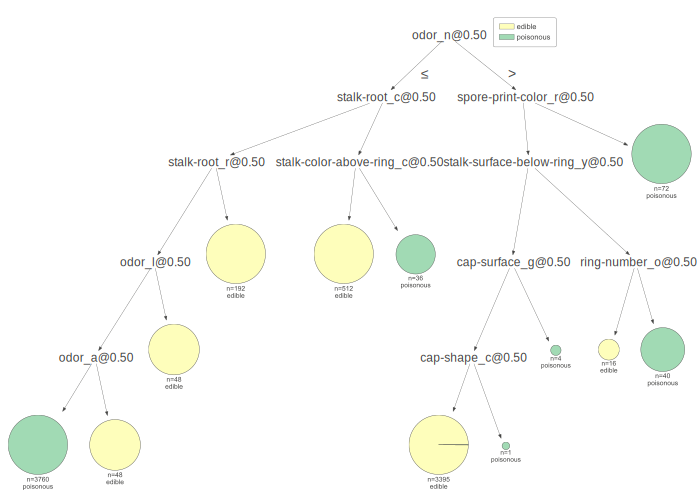

In [7]:
import logging
import dtreeviz

logging.getLogger('matplotlib.font_manager').disabled = True
viz = dtreeviz.model(tree_classifier, X, y, 
                    feature_names=X.columns, 
                    class_names=['edible', 'poisonous'])

viz.view(fancy=False)

## Creating regression trees

In [8]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

def load_california_housing_data():
    dataset = fetch_california_housing()
    X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
    y = pd.Series(data=dataset.target, name="target")
    return X, y

In [9]:
from sklearn.tree import DecisionTreeRegressor

X, y = load_california_housing_data()

regression_tree = tree.DecisionTreeRegressor(
    min_samples_split=30, min_samples_leaf=10, 
    random_state=0)

regression_tree.fit(X,y)

score = np.mean(cross_val_score(regression_tree, 
                   X, y, 
                   scoring='neg_mean_squared_error', 
                   cv=crossvalidation))

print('Mean squared error: %.3f' % abs(score))

Mean squared error: 0.367


# Getting Lost in a Random Forest

## Making machine learning accessible to all

In [10]:
import numpy as np
import pandas as pd


def load_german_credit_data():
    url = "https://archive.ics.uci.edu/ml/"
    url += "machine-learning-databases"
    url += "/statlog/german/german.data-numeric"

    col_names = [
        "checking_account", "duration", "credit_history", 
        "credit_amount", "savings_account", 
        "employment_duration", "personal_status",
        "residence_duration", "property", "age", 
        "other_installment_plans", "number_credits", 
        "people_liable", "telephone", "foreign_worker",
        "purpose_car_new", "purpose_car_used", 
        "other_debtors_none", 
        "other_debtors_coapplicant", 
        "housing_rent", "housing_own",
        "job_unskilled_non_resident", 
        "job_unskilled_resident", "job_employee", 
        "credit_risk"]

    df = pd.read_csv(
        url, header=None, names=col_names, 
        delim_whitespace=True)

    X = df.iloc[:, :-1]
    y = (df.iloc[:, -1] == 2).astype(int) # 2 = "Bad"

    return X, y

X, y = load_german_credit_data()

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

tree_classifier = DecisionTreeClassifier(random_state=0)
crossvalidation = KFold(
    n_splits=5, shuffle=True, random_state=0)
bagging = BaggingClassifier(tree_classifier, 
                            max_samples=0.7, 
                            max_features=0.7, 
                            n_estimators=300,
                            random_state=0)

scores = np.mean(cross_val_score(bagging, X, y, 
                                 scoring='roc_auc', 
                                 cv=crossvalidation))
print(f'ROC-AUC: {scores:.3f}')

ROC-AUC: 0.795


## Working with a random forest classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

crossvalidation = KFold(
    n_splits=5, shuffle=True, random_state=0)
random_forest = RandomForestClassifier(n_estimators=300,
                                       random_state=0)

score = np.mean(cross_val_score(random_forest, X, y, 
                                scoring='roc_auc', 
                                cv=crossvalidation))
print(f'ROC-AUC: {scores:.3f}')

ROC-AUC: 0.795


In [13]:
from sklearn.model_selection import validation_curve

param_range = [50, 150, 300, 600, 900, 1200, 1800,
               2400, 3000, 3600]
crossvalidation = KFold(
    n_splits=5, shuffle=True, random_state=0)
random_forest = RandomForestClassifier(
    n_estimators=300, n_jobs=-1, random_state=0)
train_scores, test_scores = validation_curve(
    random_forest, X, y, param_name='n_estimators',
    param_range=param_range, cv=crossvalidation,
    scoring='roc_auc')
mean_test_scores = np.mean(test_scores, axis=1)
for i, score in enumerate(mean_test_scores):
    print(f"n_estimators: {param_range[i]:4}, " +
          f"ROC-AUC score: {score:.3f}")

n_estimators:   50, ROC-AUC score: 0.779
n_estimators:  150, ROC-AUC score: 0.793
n_estimators:  300, ROC-AUC score: 0.797
n_estimators:  600, ROC-AUC score: 0.799
n_estimators:  900, ROC-AUC score: 0.800
n_estimators: 1200, ROC-AUC score: 0.800
n_estimators: 1800, ROC-AUC score: 0.800
n_estimators: 2400, ROC-AUC score: 0.801
n_estimators: 3000, ROC-AUC score: 0.800
n_estimators: 3600, ROC-AUC score: 0.800


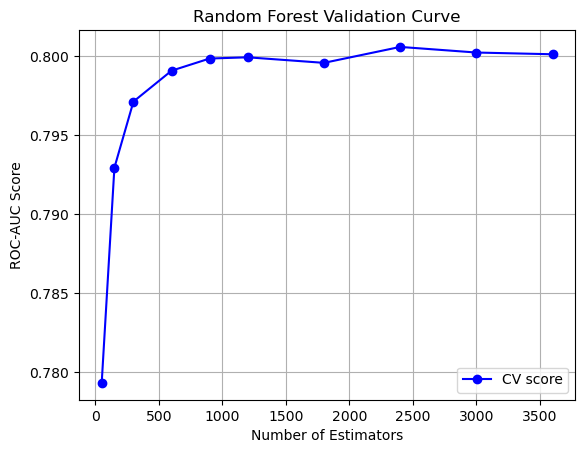

In [14]:
import matplotlib.pyplot as plt

plt.plot(param_range, mean_test_scores, 
         'bo-', label='CV score')
plt.xlabel('Number of Estimators')
plt.ylabel('ROC-AUC Score')
plt.title('Random Forest Validation Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Working with a Random Forest regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

X, y = load_california_housing_data()

rf_regressor = RandomForestRegressor(
    n_estimators=300, random_state=0)
cv = KFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(
    rf_regressor, X, y, scoring='neg_mean_squared_error', 
    cv=cv)
mean_mse = abs(scores.mean())

print(f"Mean squared error: {mean_mse:.3f}")

Mean squared error: 0.252


## Optimizing a Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

X, y = load_german_credit_data()
crossvalidation = KFold(
    n_splits=5, shuffle=True, random_state=0)
clf = RandomForestClassifier(random_state=0)
scorer = "roc_auc"

In [17]:
from sklearn.model_selection import GridSearchCV

max_features = [X.shape[1] // 3, "sqrt", "log2", None]
min_samples_leaf = [1, 10, 30]
n_estimators = [50, 100, 300, 500, 1000]
search_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "min_samples_leaf": min_samples_leaf,
}
search_cv = GridSearchCV(
    estimator=clf,
    param_grid=search_grid,
    scoring=scorer,
    cv=crossvalidation,
)
search_cv.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_features': [8, 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 30],
                         'n_estimators': [50, 100, 300, 500, 1000]},
             scoring='roc_auc')

In [18]:
best_params = search_cv.best_params_
best_score = search_cv.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 1000}
Best score: 0.8008907775588991


# Boosting predictions

In [19]:
X, y = load_german_credit_data()

## Knowing that many weak predictors win 

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score

ada = AdaBoostClassifier(
    n_estimators=1000, learning_rate=0.01, random_state=0)
cv = KFold(n_splits=5, shuffle=True, random_state=0)
roc_scores = cross_val_score(
    ada, X, y, scoring='roc_auc', cv=cv)
mean_score = roc_scores.mean()
print(f'ROC-AUC score: {mean_score:.3f}')

ROC-AUC score: 0.774


## Setting a gradient boosting classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X, y = load_german_credit_data()

crossvalidation = KFold(
    n_splits=5, shuffle=True, random_state=0)

gbc = GradientBoostingClassifier(
    n_estimators=300, subsample=1.0, max_depth=2,
    learning_rate=0.1, random_state=0)
crossvalidation = KFold(
    n_splits=5, shuffle=True, random_state=0)
score = np.mean(cross_val_score(
    gbc, X, y, scoring='roc_auc', cv=crossvalidation))
print(f'ROC-AUC: {score:.3f}')

ROC-AUC: 0.784


## Running a gradient boosting regressor

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold

X, y = load_california_housing_data()

gbr = GradientBoostingRegressor(
    n_estimators=1000, subsample=1.0, max_depth=3, 
    learning_rate=0.01, random_state=0)

cv = KFold(n_splits=5, shuffle=True, random_state=0)

mse = np.mean(cross_val_score(
    gbr, X, y, scoring='neg_mean_squared_error', cv=cv))

print(f"Mean squared error: {abs(mse):.3f}")


Mean squared error: 0.285


## Using GBM hyper-parameters

In [23]:
from sklearn.model_selection import KFold

X, y = load_german_credit_data()

cross_val = KFold(
    n_splits=5, shuffle=True, random_state=0)

gbr = GradientBoostingRegressor(
    n_estimators=1000,  subsample=1.0, 
    max_depth=3,  learning_rate=0.01, 
    random_state=0)

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X, y = load_california_housing_data()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=0)

gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=0)

search_grid = {'subsample': [1.0, 0.9, 0.7], 
               'max_depth': [2, 3, 4, 5, 6]}

search_func = GridSearchCV(
    estimator=gbr, param_grid=search_grid,
    scoring='neg_mean_squared_error',
    cv=crossvalidation)

search_func.fit(X, y)

best_params = search_func.best_params_
best_score = abs(search_func.best_score_)

print(f'Best parameters: {best_params}')
print(f'Best mean squared error: {best_score:.3f}')

Best parameters: {'max_depth': 6, 'subsample': 0.7}
Best mean squared error: 0.220


# Using XGBoost

In [25]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

X, y = load_german_credit_data()

cv = KFold(n_splits=5, shuffle=True, random_state=0)

params = {'n_estimators': 800, 'subsample': 0.7,
          'max_depth': 2, 'learning_rate': 0.015,
          'random_state': 0,
          'objective': 'binary:logistic',
          'eval_metric': 'auc'}

gbc = xgb.XGBClassifier(**params)

score = np.mean(cross_val_score(
    gbc, X, y, scoring='roc_auc', cv=cv))

print(f'ROC-AUC: {score:.3f}')

ROC-AUC: 0.801


In [26]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

X, y = load_california_housing_data()

xg_reg = xgb.XGBRegressor(
    n_estimators=900, subsample=0.8, max_depth=5, 
    learning_rate=0.07, random_state=0)

cv = KFold(n_splits=5, shuffle=True, random_state=0)

mse = np.mean(cross_val_score(
    xg_reg, X, y, scoring='neg_mean_squared_error',
    cv=cv))

print(f"Mean squared error: {abs(mse):.3f}")

Mean squared error: 0.200
